# ---EDA and Data Balancing
# ---Multiple MODELs  ---

#### Reference:
https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85

In [1]:
# Importing Packages, Modules and Functions
import numpy as np
import pandas as pd

# Plotting librarires
import matplotlib.pyplot as plt
import seaborn as sns

# Techniques
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Classification Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Creating input and putput
#forest_fires = pd.read_excel(\"C:/Users/Owner/Downloads/forestfires.xlsx\")
dataset = pd.read_excel("forestfires.xlsx")
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small


In [3]:
# Creating input , output variables
features = dataset[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']]
#'size_category'
label = dataset['size_category']
features

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0
...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0


In [5]:
label.unique()

array(['small', 'large'], dtype=object)

# Normalization 

# EDA

#### 1. Checking data is balanced or not

C:\Users\shilp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

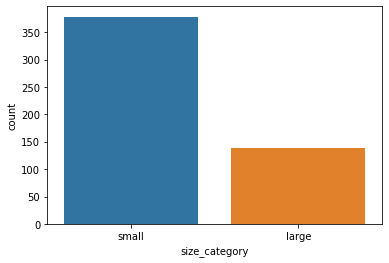

In [4]:
# a. By Plotting
sns.countplot(label)

In [5]:
# b. By getting percentage of counts
dataset['size_category'].value_counts(normalize=True)

small    0.731141
large    0.268859
Name: size_category, dtype: float64

In [6]:
features.shape

(517, 8)

<AxesSubplot:xlabel='size_category', ylabel='RH'>

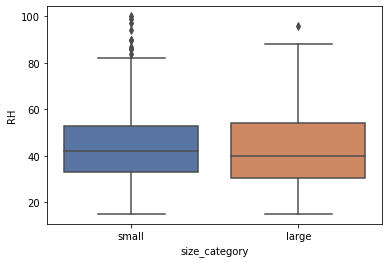

In [7]:
# c.Checking skewness
sk =features.skew()
sns.boxplot(x=label, y = features['RH'], palette='deep')

#### 2. Numeric Inputs vs Target - Grouped Box plots

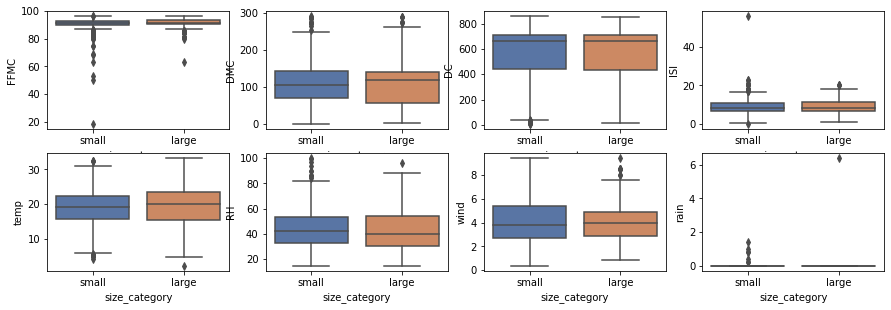

In [53]:
fig = plt.figure(figsize = (15,10))

#for i in range(1,len(features.columns)):
for key,val in enumerate(features.columns):
    fig.add_subplot(4,4, key+1)
    sns.boxplot(x=label,y=features[val], palette='deep')

<AxesSubplot:xlabel='temp', ylabel='Count'>

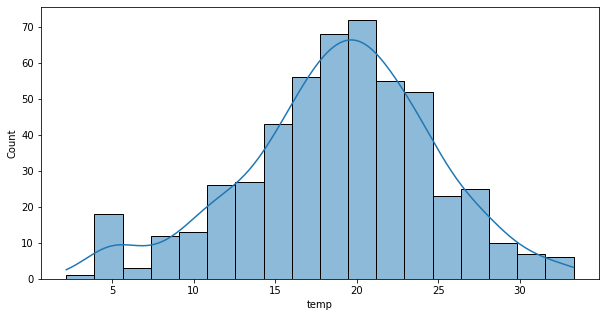

In [9]:
# 3. Checking Skewness
plt.figure(figsize=(10,5))
sns.histplot(data=features, x = 'temp', kde=True)

In [10]:
# 4. checking Skewness
y = np.where(label=='small',0,1)
y=pd.Series(y)
y.skew()
# REsult: 1.045 . data is highly skewed

1.0457009299050588

<AxesSubplot:xlabel='size_category', ylabel='Count'>

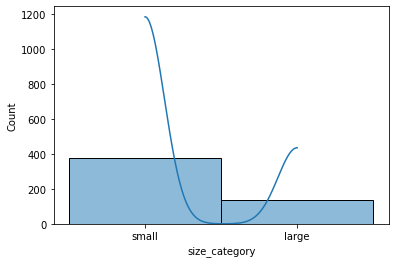

In [11]:
sns.histplot(x=label, kde=True)

<AxesSubplot:>

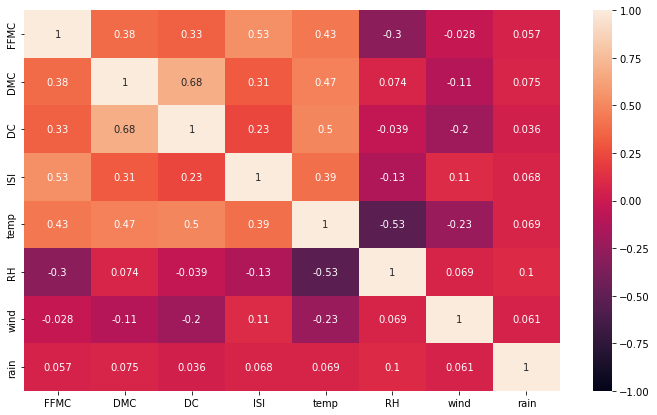

In [12]:
# Plotting relationship between numerical variables
corr = features.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, vmin=-1, xticklabels = features.columns,annot=True)

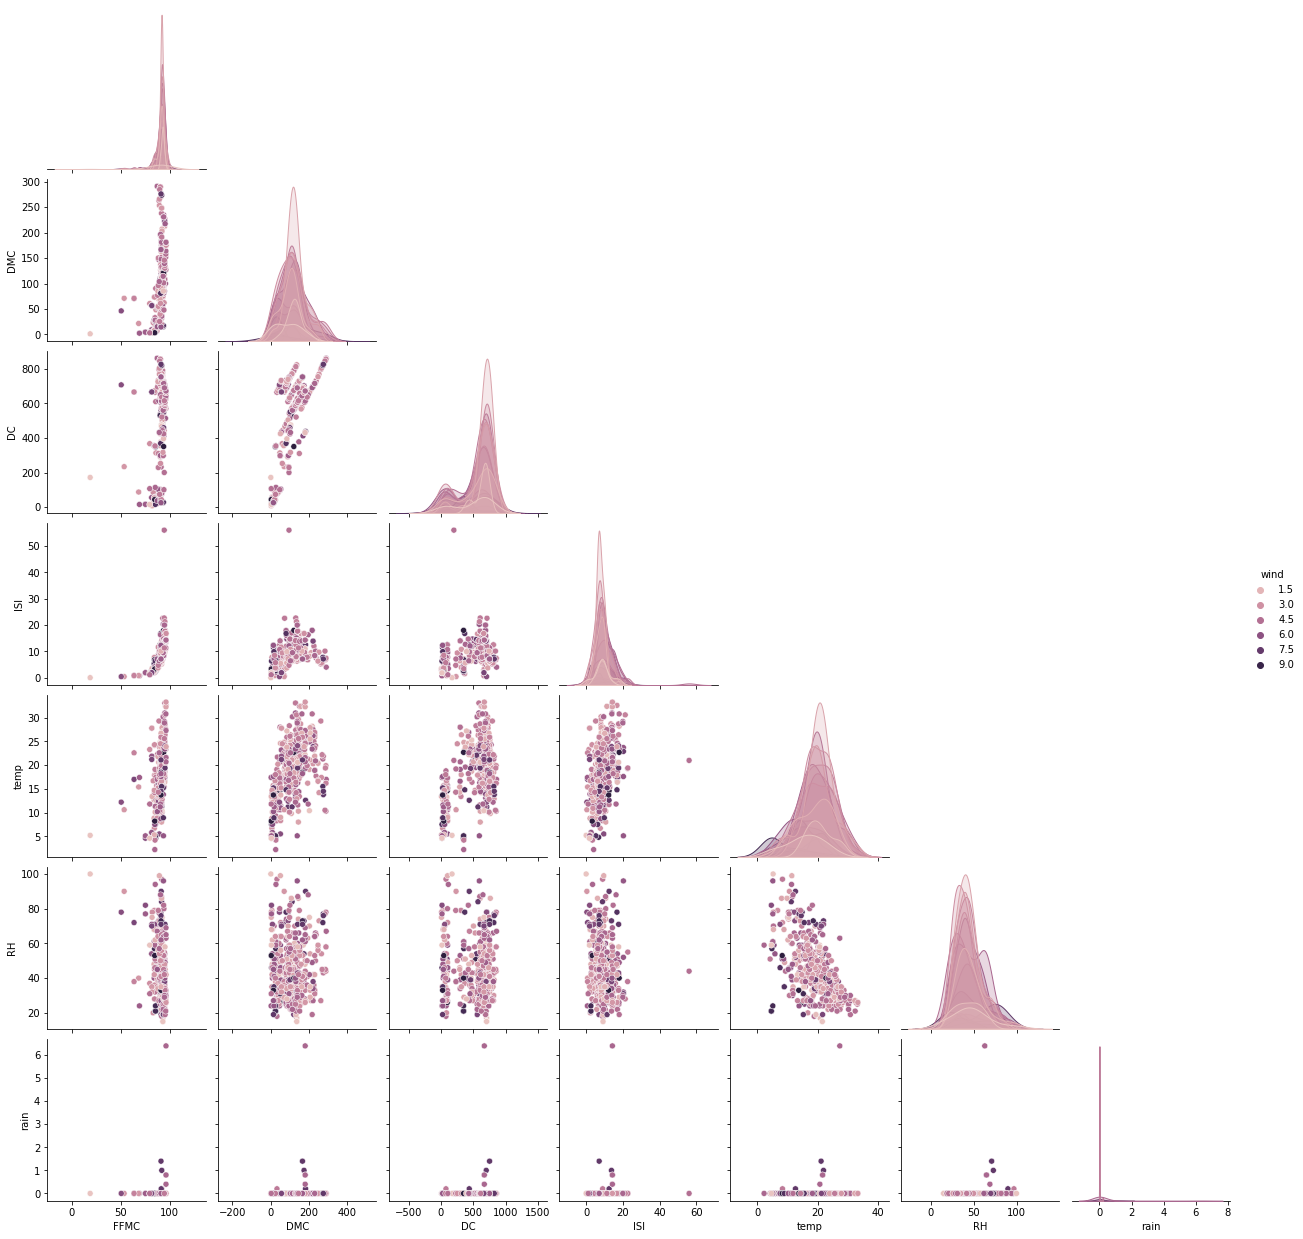

In [13]:
# plotting relationship of multiple inputs versus target.
sns.pairplot(features, hue= 'wind', corner=True)

# Feature Engineering

### Feature Importance - Chi Square Test

In [14]:
# For 

### Normalization

In [15]:
#ss = StandardScaler()
#standardized_features = ss.fit_transform(features)


In [16]:
#y=np.where(label=='small',0,1)

# Model Building

In [17]:
#Train Test Split
# CHANGE- train test split cuts down a number of steps and size variables
train_x,test_x,train_y,test_y = train_test_split(features,label)

C:\Users\shilp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


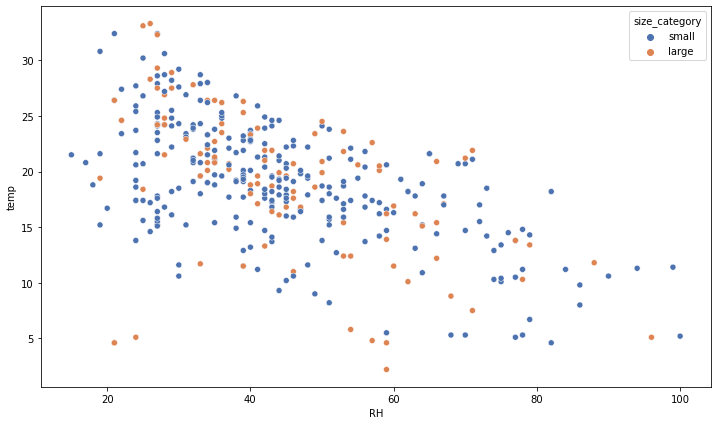

In [18]:
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
#CHANGE:-------------REMOVED GRID BEAUTIFIFACTION STEPS here ----------
#sns.scatterplot(train_x['RH'], train_x['temp'],hue=train_x['size_category'], palette='deep')
sns.scatterplot(train_x['RH'], train_x['temp'],hue=train_y, palette='deep')

plt.show()

### Data Balancing -SMOTE (Synthetic Minority OverSampling Technique)

In [19]:
# Creating balanced Data
from collections import Counter
smote = SMOTE()
print('label before resampling', Counter(train_y))
x_sm,y_sm = smote.fit_resample(train_x, train_y)
print('label after resampling', Counter(y_sm))

label before resampling Counter({'small': 279, 'large': 108})
label after resampling Counter({'small': 279, 'large': 279})


C:\Users\shilp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

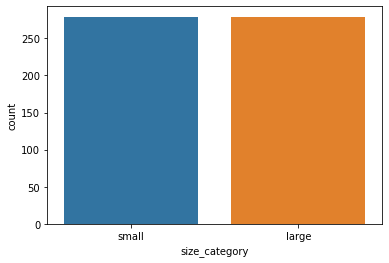

In [20]:
sns.countplot(y_sm)

<AxesSubplot:xlabel='size_category', ylabel='Count'>

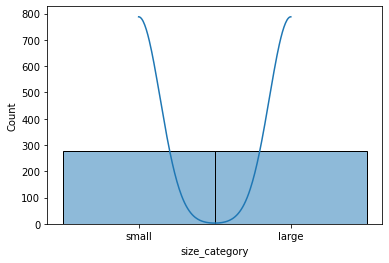

In [21]:
sns.histplot(x=y_sm, kde=True)

In [1]:
# Checking skewness of data after balancing the values
a1 = np.where(y_sm == 'small',0,1)
a1 = pd.Series(a1)
a1.skew()
a1.shape
# Result: 0.0. Normal distribution

NameError: name 'np' is not defined

In [23]:
# Building the model using kernel ='poly'
model = SVC(kernel='poly', degree=2)
model.fit(train_x, train_y)

SVC(degree=2, kernel='poly')

<class 'numpy.ndarray'>


ValueError: X.shape[1] = 2 should be equal to 8, the number of features at training time

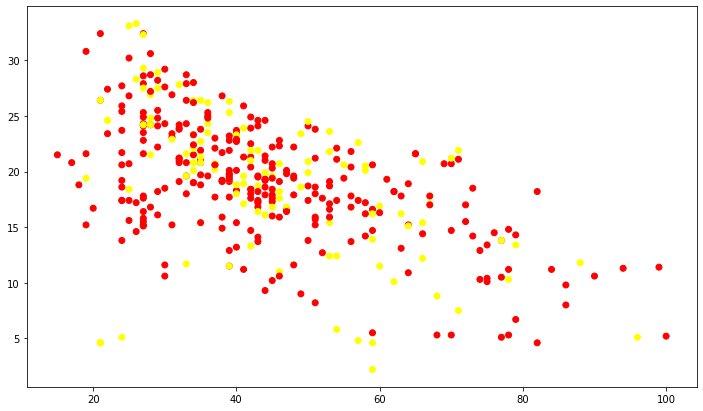

In [26]:
#plotting decion boundary, margins, & support vectors

fig, ax = plt.subplots(figsize = (12, 7))
#-CHANGE-------------REMOVED GRID BEAUTIFIFACTION STEPS here ----------
# Create grid to evaluate model
xx = np.linspace(-100, max(features['RH']) + 100, len(train_x))
print(type(xx))
yy = np.linspace(-11_000, max(features['temp']) + 100, len(train_y))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Assigning different colors to the classes
colors = train_y
# --CHANGE: line 14: colors = 1 to colors ='small' and color codes to actual colors-----
colors = np.where(colors == 'small', 'red', 'yellow') 
# Plot the dataset
ax.scatter(train_x['RH'], train_x['temp'], c = colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape[1])
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['dashdot', 'solid', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 100, linewidth = 1, facecolors = 'none', edgecolors = 'k')
plt.show()

In [56]:
# Model Prediction and Accuracy Report

predict_poly = model.predict(test_x)
# Accuracy Score
print("Polynominal KERNEL \n")
accuracy = accuracy_score(test_y,predict_poly)
print("Accuracy: \n", '-'*50, "\n", accuracy*100)

#Confusion matrix
cm_poly = confusion_matrix(test_y,predict_poly)
print("\nConfusion Matrix: \n", '-'*50, "\n", cm_poly)

#Classification Report
cr_poly = classification_report(test_y,predict_poly)
print("\nClassification Report: \n", '-'*50, "\n", cr_poly) 

Polynominal KERNEL 

Accuracy: 
 -------------------------------------------------- 
 70.76923076923077

Confusion Matrix: 
 -------------------------------------------------- 
 [[ 3 28]
 [10 89]]

Classification Report: 
 -------------------------------------------------- 
               precision    recall  f1-score   support

       large       0.23      0.10      0.14        31
       small       0.76      0.90      0.82        99

    accuracy                           0.71       130
   macro avg       0.50      0.50      0.48       130
weighted avg       0.63      0.71      0.66       130



### Model Pipeline 

In [28]:
model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(GaussianNB())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(KNeighborsClassifier())

In [29]:
# Model Evaluation

acc_list= []
cm_list = []
auc_list = []
model_list = []
i=0
for model in model_pipeline:
    model_list.append(model)
    model.fit(train_x,train_y)
    y_pred = model.predict(test_x)
    
    acc_list.append(accuracy_score(test_y,y_pred))
    cm_list.append(confusion_matrix(test_y,y_pred))
    i+1
model_df = pd.DataFrame({'Model': model_list,'Accuracy': acc_list })
#    print(model, "\n", acc_list[i] *100 , '\nConfusion Matrix\n', cm_list[i])
model_df
 

C:\Users\shilp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy
0,LogisticRegression(),0.761538
1,SVC(),0.761538
2,GaussianNB(),0.276923
3,DecisionTreeClassifier(),0.638462
4,"(DecisionTreeClassifier(max_features='auto', r...",0.715385
5,KNeighborsClassifier(),0.707692


# Feature Importance using Random Forest

In [31]:
rfc_model = RandomForestClassifier()
rfc_model.fit(train_x,train_y)
y_rfc_pred = rfc_model.predict(test_x)

acc = accuracy_score(test_y, y_rfc_pred)
acc

0.7230769230769231

In [33]:
imp_feature = rfc_model.feature_importances_
imp_feature = pd.Series(imp_feature,index=features.columns)

In [50]:
imp_feature.sort_values(ascending=False)

temp    0.210278
RH      0.163486
DMC     0.139271
DC      0.128564
ISI     0.121398
wind    0.119551
FFMC    0.116078
rain    0.001375
dtype: float64

<AxesSubplot:>

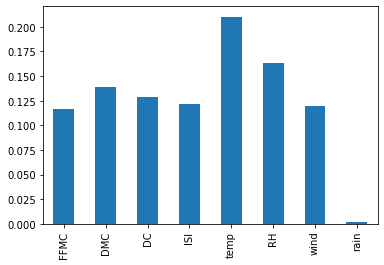

In [52]:
#Plotting Feature Importances
imp_feature.plot.bar()

# ---- SVM ENDS---